In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('powergrid_projects.csv', index_col=0)

In [12]:
df.columns

Index(['Project_ID', 'Date', 'Month', 'Year', 'Location', 'Region',
       'Tower_Type', 'Substation_Type', 'Budget', 'Cement_tons', 'Steel_tons',
       'Wires_tons', 'Tax_percent', 'Essential_Rank_Cement',
       'Essential_Rank_Steel', 'Essential_Rank_Wires', 'Month_sin',
       'Month_cos', 'Cement_tons_lag1', 'Steel_tons_lag1', 'Wires_tons_lag1',
       'Cement_tons_lag2', 'Steel_tons_lag2', 'Wires_tons_lag2',
       'Cement_tons_lag3', 'Steel_tons_lag3', 'Wires_tons_lag3',
       'Cement_tons_roll3', 'Steel_tons_roll3', 'Wires_tons_roll3',
       'Cement_tons_roll6', 'Steel_tons_roll6', 'Wires_tons_roll6'],
      dtype='object')

In [13]:
input = df[['Year','Location','Region','Tower_Type','Substation_Type','Budget','Tax_percent','Month_sin','Month_cos',
        'Cement_tons_lag1','Steel_tons_lag1', 'Wires_tons_lag1',
       'Cement_tons_lag2', 'Steel_tons_lag2', 'Wires_tons_lag2',
       'Cement_tons_lag3', 'Steel_tons_lag3', 'Wires_tons_lag3',
       'Cement_tons_roll3', 'Steel_tons_roll3', 'Wires_tons_roll3',
       'Cement_tons_roll6', 'Steel_tons_roll6', 'Wires_tons_roll6']]
output = df[['Cement_tons','Steel_tons','Wires_tons']]

input = pd.get_dummies(input, drop_first=True)

In [15]:
features_train = input[input['Year'] <= 2024]
targets_train = output[input['Year'] <= 2024]

features_test = input[input['Year'] == 2025]
targets_test = output[input['Year'] == 2025]

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=500, random_state=33)

rf_model.fit(features_train,targets_train)

predictions = rf_model.predict(features_test)

In [ ]:
real_data = df[df['Year'] == 2025].groupby('Date')[['Cement_tons','Steel_tons','Wires_tons']].sum()
predicted_data = pd.DataFrame(predictions,columns=['Cement_tons','Steel_tons','Wires_tons'])
predicted_data['Date'] = df[df['Year'] == 2025]['Date'].values
predicted_data = predicted_data.groupby('Date')[['Cement_tons','Steel_tons','Wires_tons']].sum()


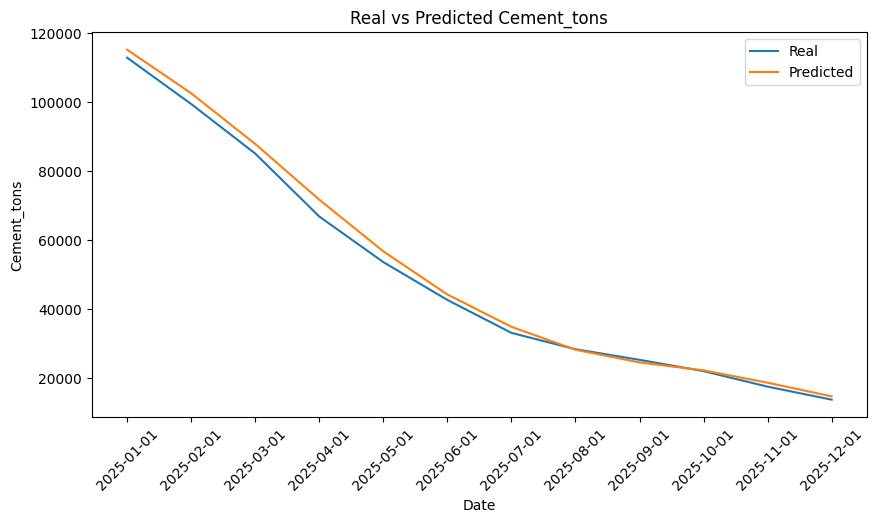

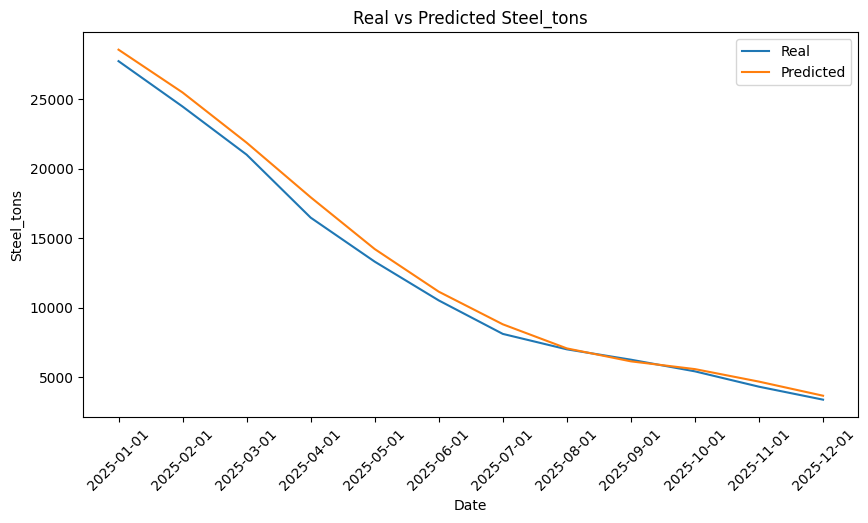

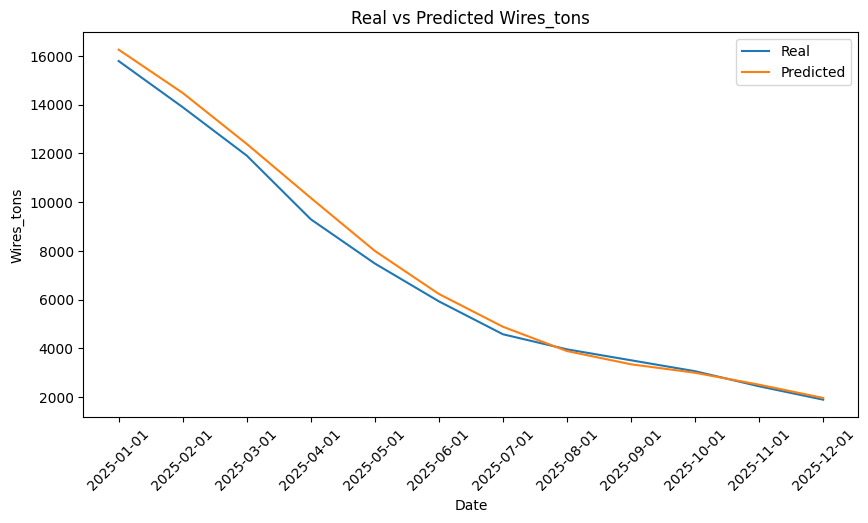

In [30]:
for col in ['Cement_tons','Steel_tons','Wires_tons']:
    plt.figure(figsize=(10,5))
    plt.plot(real_data.index, real_data[col], label="Real")
    plt.plot(predicted_data.index, predicted_data[col], label="Predicted")
    plt.title(f"Real vs Predicted {col}")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

In [31]:
# pick one project
project_id = 20000

# real data for that project in 2025
real_data = df[(df['Year'] == 2025) & (df['Project_ID'] == project_id)][['Date','Cement_tons','Steel_tons','Wires_tons']]

# predicted data for that project in 2025
predicted_data = pd.DataFrame(predictions, columns=['Cement_tons','Steel_tons','Wires_tons'])
predicted_data['Project_ID'] = df[df['Year'] == 2025]['Project_ID'].values
predicted_data['Date'] = df[df['Year'] == 2025]['Date'].values

predicted_data = predicted_data[predicted_data['Project_ID'] == project_id][['Date','Cement_tons','Steel_tons','Wires_tons']]


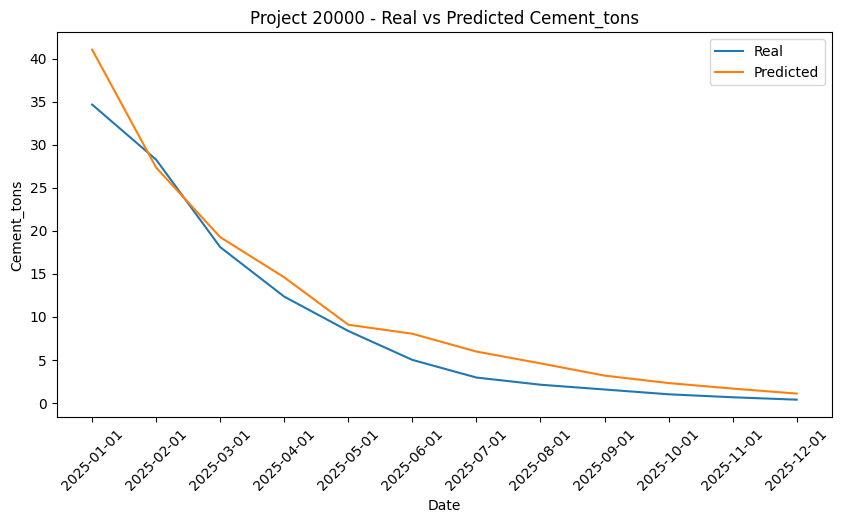

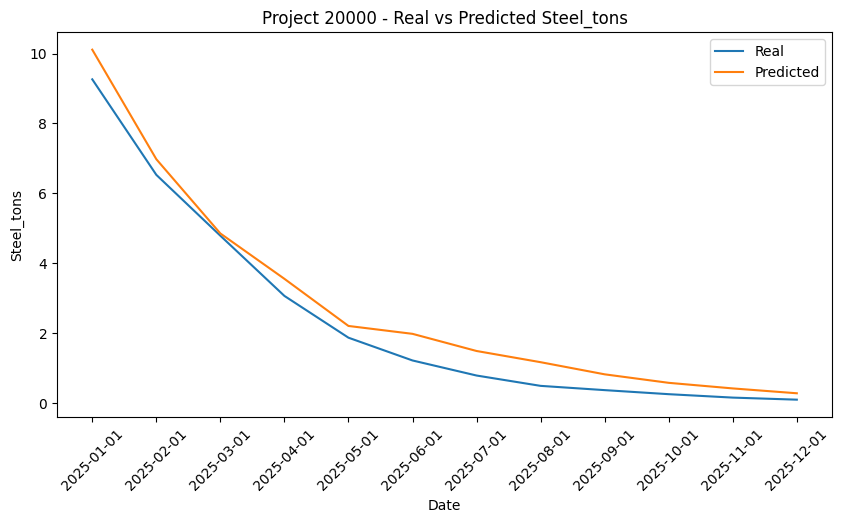

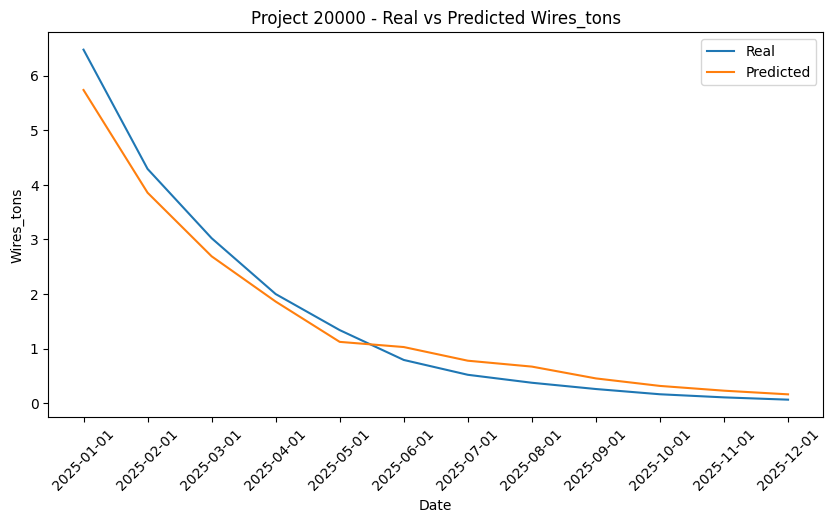

In [33]:
import matplotlib.pyplot as plt

for col in ['Cement_tons','Steel_tons','Wires_tons']:
    plt.figure(figsize=(10,5))
    plt.plot(real_data['Date'], real_data[col], label="Real")
    plt.plot(predicted_data['Date'], predicted_data[col], label="Predicted")
    plt.title(f"Project {project_id} - Real vs Predicted {col}")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# align on Date just to be safe
merged = real_data.merge(predicted_data, on="Date", suffixes=("_real", "_pred"))
merged


,Date,Cement_tons_real,Steel_tons_real,Wires_tons_real,Cement_tons_pred,Steel_tons_pred,Wires_tons_pred
0,2025-01-01,34.649,9.264,6.479,41.026274,10.113214,5.739916
1,2025-02-01,28.246,6.530,4.293,27.324260,6.977856,3.856790
2,2025-03-01,18.088,4.787,3.023,19.248572,4.851574,2.691028
3,2025-04-01,12.341,3.064,1.999,14.581090,3.553090,1.861336
4,2025-05-01,8.353,1.868,1.338,9.076046,2.204020,1.122430
5,2025-06-01,4.995,1.216,0.791,8.034804,1.978340,1.027578
6,2025-07-01,2.946,0.785,0.519,5.963956,1.487338,0.777172
7,2025-08-01,2.113,0.489,0.373,4.593942,1.166618,0.669080
8,2025-09-01,1.559,0.367,0.258,3.172130,0.819444,0.452558
9,2025-10-01,1.002,0.251,0.162,2.304492,0.575936,0.314940


In [35]:
for col in ['Cement_tons','Steel_tons','Wires_tons']:
    y_true = merged[f"{col}_real"]
    y_pred = merged[f"{col}_pred"]

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\nMetrics for {col}:")
    print(f"  MAE  = {mae:.2f}")
    print(f"  MSE  = {mse:.2f}")
    print(f"  RMSE = {rmse:.2f}")
    print(f"  R²   = {r2:.2f}")



Metrics for Cement_tons:
  MAE  = 2.05
  MSE  = 6.56
  RMSE = 2.56
  R²   = 0.95

Metrics for Steel_tons:
  MAE  = 0.46
  MSE  = 0.27
  RMSE = 0.52
  R²   = 0.97

Metrics for Wires_tons:
  MAE  = 0.27
  MSE  = 0.10
  RMSE = 0.32
  R²   = 0.97
